<a href="https://colab.research.google.com/github/smithasunilnair/MPA/blob/main/Copy_of_cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Dataset - click https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [37]:
# Go to your 'Account' in Kaggle.
# Click 'Create new API token' - json file will be downloaded
# Need to upload it 
# Next Copy the API command from the three dots (next to Download button)


In [38]:
# ref: https://www.youtube.com/watch?v=0K4J_PTgysc&list=RDCMUCCWi3hpnq_Pe03nGxuS7isg&index=26

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 24.2MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.8MB/s]


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [12]:
# generators  -- used for processing large amt of data in batches by dividing the data (image_dataset_from_directory is the generator function name) 
#REf: https://keras.io/api/data_loading/image/

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train', # copy the path of train data by right clicking the train folder
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)  # resizing the images to a size uniformly  -- original dataset are of diff size
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)   # images are stored as numpy array

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
# Normalize  (bringing the pixel values between 0 and 1)
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process) 
validation_ds = validation_ds.map(process)

In [14]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [17]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 93ms/step - loss: 0.5985 - accuracy: 0.6741 - val_loss: 0.5029 - val_accuracy: 0.7594
Epoch 2/10
625/625 [==============================] - 57s 91ms/step - loss: 0.4699 - accuracy: 0.7721 - val_loss: 0.5216 - val_accuracy: 0.7640
Epoch 3/10
625/625 [==============================] - 58s 92ms/step - loss: 0.3754 - accuracy: 0.8306 - val_loss: 0.4371 - val_accuracy: 0.7970
Epoch 4/10
625/625 [==============================] - 58s 92ms/step - loss: 0.2585 - accuracy: 0.8910 - val_loss: 0.5436 - val_accuracy: 0.7842
Epoch 5/10
625/625 [==============================] - 59s 94ms/step - loss: 0.1552 - accuracy: 0.9384 - val_loss: 0.7414 - val_accuracy: 0.7920
Epoch 6/10
625/625 [==============================] - 59s 93ms/step - loss: 0.0916 - accuracy: 0.9661 - val_loss: 0.9393 - val_accuracy: 0.7812
Epoch 7/10
625/625 [==============================] - 58s 91ms/step - loss: 0.0649 - accuracy: 0.9772 - val_loss: 1.1787 - val_accuracy:

Training accuracy is high but validation accuracy is low

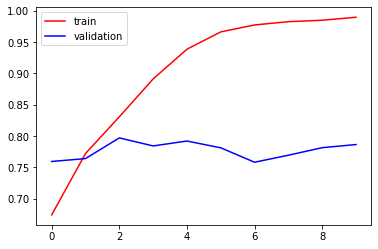

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

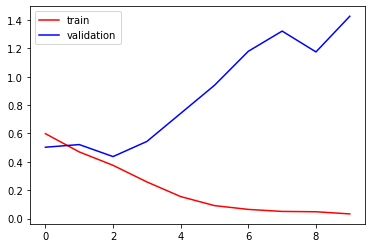

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

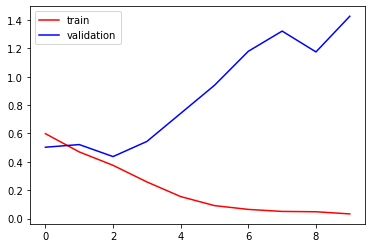

In [51]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# So, there is overfitting
# Different ways to reduce overfitting


# Add more data
# Data Augmentation 
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [22]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test', # copy the path of train data by right clicking the train folder
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)  # resizing the images to a size uniformly  -- original dataset are of diff size
)

Found 5000 files belonging to 2 classes.


In [23]:
# Normalize  (bringing the pixel values between 0 and 1)
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

test_ds = test_ds.map(process) 

In [52]:
import cv2  # open cv library

In [60]:
test_img = cv2.imread('/content/test/dogs/dog.10006.jpg')

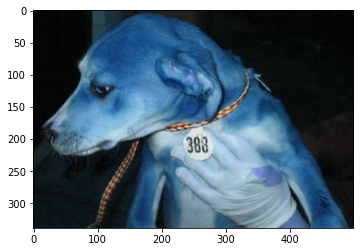

In [61]:
plt.imshow(test_img)

In [62]:
test_img.shape

(339, 499, 3)

In [63]:
test_img = cv2.resize(test_img,(256,256))  # trained data size is 256 * 256

In [64]:
test_input = test_img.reshape((1,256,256,3))  #   1 image of size 256 * 256 and color image with 3 channels

In [65]:
model.predict(test_input)  # 0 refering to cat and 1 refering to dog

1/1 [==============================] - 0s 25ms/step


array([[1.]], dtype=float32)

In [66]:
test_img = cv2.imread('/content/test/cats/cat.10.jpg')

In [ ]:
test_img = cv2.resize(test_img,(256,256))  # trained data size is 256 * 256

In [ ]:
test_input = test_img.reshape((1,256,256,3))  #   1 image of size 256 * 256 and color image with 3 channels

In [ ]:
model.predict(test_input)  # 0 refering to cat and 1 refering to dog